#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Importing excel data to data frame

In [2]:
df=pd.read_excel("C:/Users/akash/Desktop/Scaler/aerofit.xlsx")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe(include=['object','int64'])

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### As we see Age,Income and Miles std >2  and there is a significant difference between mean and median.

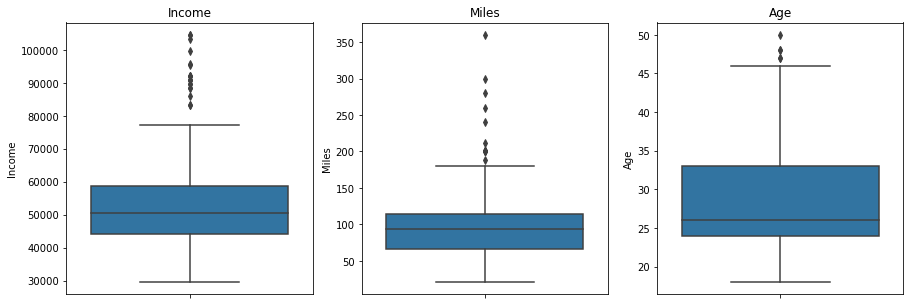

In [6]:
l=['Income','Miles','Age']
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
axs=axs.flatten()
index=0
for i in l:
    sns.boxplot(y=i,data=df,ax=axs[index]).set(title=i)
    index+=1

Most of the outliers are seems to be lies in upper bound (1.5IQR+Q3)

Lets see how many outliers we have in each

In [7]:
Upper_bound_I = (1.5*stats.iqr(df['Income']))+np.quantile(df['Income'],0.75)
Upper_bound_A = (1.5*stats.iqr(df['Age']))+np.quantile(df['Age'],0.75)
Upper_bound_M = (1.5*stats.iqr(df['Miles']))+np.quantile(df['Miles'],0.75)
print('No of Outliers for Income - %s' %len(df.loc[df['Income']>Upper_bound_I]))
print('No of Outliers for Miles - %s' %len(df.loc[df['Miles']>Upper_bound_M]))
print('No of Outliers for Age - %s' %len(df.loc[df['Age']>Upper_bound_A]))

No of Outliers for Income - 19
No of Outliers for Miles - 13
No of Outliers for Age - 5


(19+13+5)=37 this is 20 percent of dataset so its not advicable to remove it.

#### How much percent of sales for each product (Marginal Probability)

In [8]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
df['Product'].value_counts()*(100/180)

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

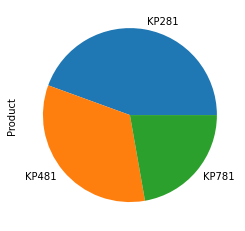

In [10]:
df['Product'].value_counts().plot(kind='pie')
plt.show()

#### How featurs like MaritalStatus and Gender affect the purchase (Conditional Probability)

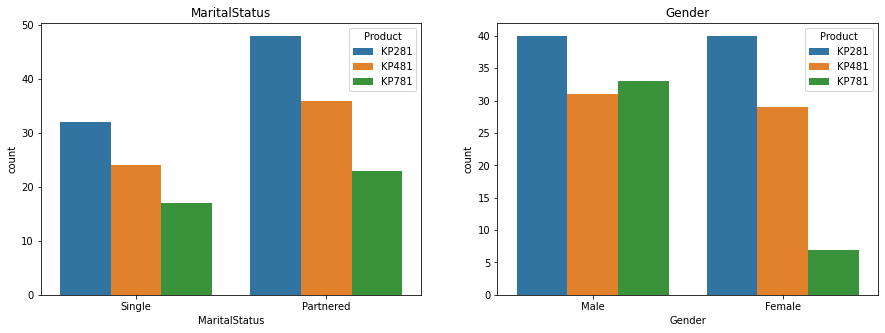

In [11]:
l=['MaritalStatus','Gender']
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(15, 5))
axs=axs.flatten()
index=0
for i in l:
    sns.countplot(x=i,hue='Product',data=df,ax=axs[index]).set(title=i)
    index+=1

##### From above  :
 - we can clearly say partnered customers buy the most number of products in all 3 types of product.
 - Male buys more number of advanced level product
#### Above give us the pure count as we saw in describe we have more Male than Female so lets check the probability and see who have more probability to buy each product

In [12]:
no_of_females = len(df.loc[df['Gender'] == 'Female'])
no_of_males = len(df.loc[df['Gender'] == 'Male'])
no_of_single = len(df.loc[df['MaritalStatus'] == 'Single'])
no_of_partnered = len(df.loc[df['MaritalStatus'] == 'Partnered'])
df_g = pd.crosstab(df['Gender'],df['Product'])
df_m = pd.crosstab(df['MaritalStatus'],df['Product'])

In [13]:
df_m

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [14]:
df_g.loc['Female'] = df_g.loc['Female']/no_of_females
df_g.loc['Male'] = df_g.loc['Male']/no_of_males
df_g

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


##### Above is conditional probabilities, for example 0.53 is probability of buying KP281 given customer is female.
Conclusions:
 - Female prefer entry level
 - Males prefer advanced level

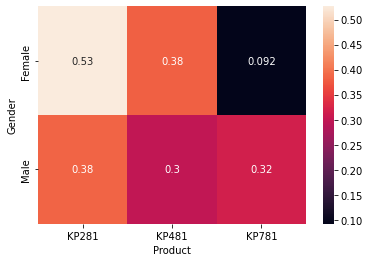

In [15]:
sns.heatmap(df_g,annot=True)
plt.show()

In [16]:
df_m.loc['Single'] = df_m.loc['Single']/no_of_single
df_m.loc['Partnered'] = df_m.loc['Partnered']/no_of_partnered
df_m

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


##### Conclusions
 - when we saw the graph it looked as partnered people buy more in all type of products but as we see the table Partnered and Single both have preety much the same probability in each product.

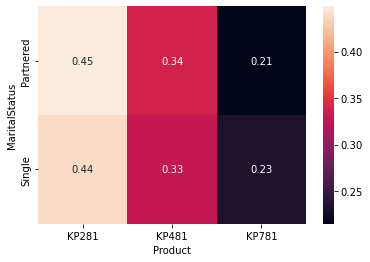

In [17]:
sns.heatmap(df_m,annot=True)
plt.show()

#### Lets compare 
 - Single male vs Single female
 - Patnered male vs Patnered female
 - Single male vs Patnered male
 - Single female vs Patnered female
 
 ##### First lets go with graph as we followed in for above comparison then will go into probability

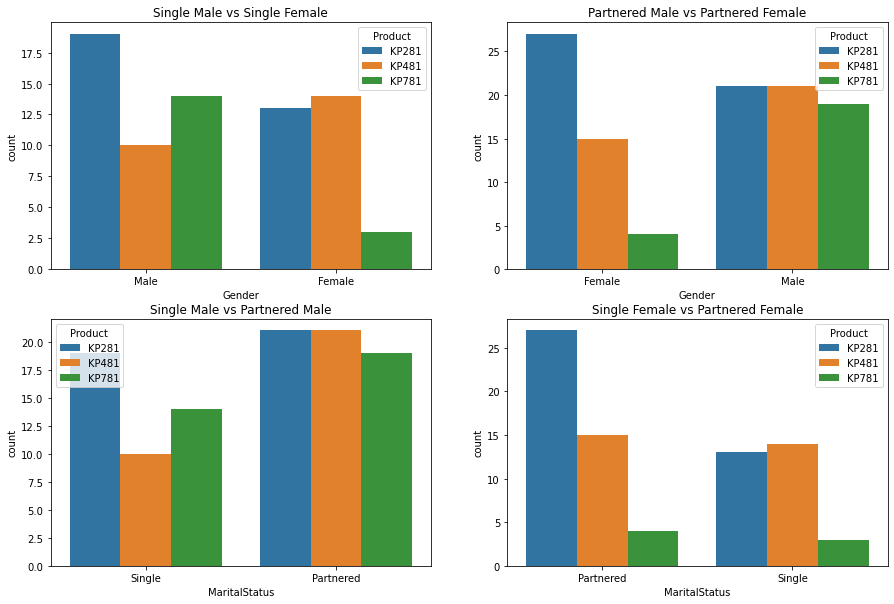

In [18]:
l=['Gender','MaritalStatus']
k=['Single','Partnered','Male','Female']
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
axs=axs.flatten()
index=0

for i in l:
    for _ in range(0,2):
        if i == 'Gender':
            t = k[index]+' Male vs '+k[index]+' Female'
            d=df.loc[df['MaritalStatus'] == k[index]]
        else:
            t = 'Single '+k[index]+' vs Partnered '+k[index]
            d=df.loc[df['Gender'] == k[index]]
        sns.countplot(x=i,hue='Product',data=d,ax=axs[index]).set(title=t)
        index+=1

### Conclusions
#### Single Male vs Single Female
 - Single male out buy single female in all type of product except for mid level.
#### Partnered Male vs Partenerd Female
 - Partenered Female prefers entry level model.
 - Patnered Male seems to buy equally.
#### Single Male vs Patnered Male
 - Patnered male out buy Single male in all type of product.
#### Single Female vs Patnered Female
 - Patnered Female out buy Single Female in all type of product.
 - Single Female prefers mid level and entry level product with almost same level.
##### Best Buyers for each Product in terms of count.
 - KP281 -- Partnered Female
 - KP481 -- Patnered Male
 - KP781 -- Patnered Male
 
#### Lets check Probaility for all different features

In [19]:
df_male = df.loc[df['Gender'] == 'Male']
df_female = df.loc[df['Gender'] == 'Female']
no_of_singleMales = len(df_male.loc[df_male['MaritalStatus'] == 'Single'])
no_of_partneredMales = len(df_male.loc[df_male['MaritalStatus'] == 'Partnered'])
no_of_singleFemales = len(df_female.loc[df_female['MaritalStatus'] == 'Single'])
no_of_partneredFemales = len(df_female.loc[df_female['MaritalStatus'] == 'Partnered'])
df_givenMale = pd.crosstab(df_male['MaritalStatus'],df_male['Product'])
df_givenFemale = pd.crosstab(df_female['MaritalStatus'],df_female['Product'])

In [20]:
df_givenMale.loc['Partnered'] = df_givenMale.loc['Partnered']/no_of_partneredMales
df_givenMale.loc['Single'] = df_givenMale.loc['Single']/no_of_singleMales
df_givenMale['Given']=['Partnered Male','Single Male']
df_givenMale

Product,KP281,KP481,KP781,Given
MaritalStatus,,,,
Partnered,0.344262,0.344262,0.311475,Partnered Male
Single,0.441860,0.232558,0.325581,Single Male


In [21]:
df_givenFemale.loc['Partnered'] = df_givenFemale.loc['Partnered']/no_of_partneredFemales
df_givenFemale.loc['Single'] = df_givenFemale.loc['Single']/no_of_singleFemales
df_givenFemale['Given']=['Partnered Female','Single Female']
df_givenFemale

Product,KP281,KP481,KP781,Given
MaritalStatus,,,,
Partnered,0.586957,0.326087,0.086957,Partnered Female
Single,0.433333,0.466667,0.100000,Single Female


In [22]:
df_prob=df_givenMale.append(df_givenFemale)
df_prob.set_index('Given',inplace=True)
df_prob

Product,KP281,KP481,KP781
Given,,,
Partnered Male,0.344262,0.344262,0.311475
Single Male,0.441860,0.232558,0.325581
Partnered Female,0.586957,0.326087,0.086957
Single Female,0.433333,0.466667,0.100000


#### Conclusions
 - Partnered Female have more probability to buy KP281
 - Single Female have more probability to buy KP481
 - Single Male have more probability to buy KP781 , Also Partnered Male have almost same probability. As per counts we thought Partnered buy out Single male in all type of product which is proved wrong here with probability.

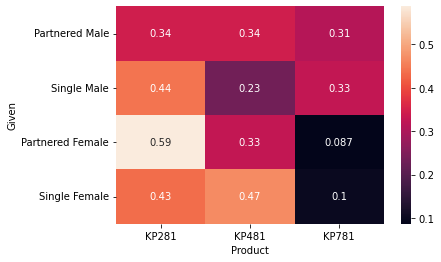

In [23]:
sns.heatmap(df_prob,annot=True)
plt.show()

### Lets compare Income, Age , Education vs product, Plot with median instead of mean as we had some outliers.

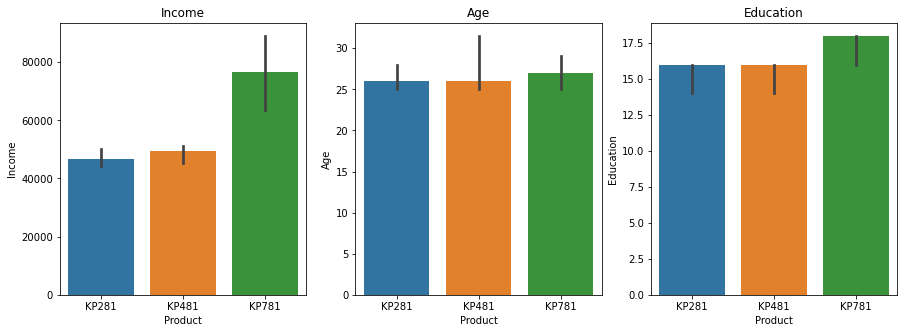

In [24]:
l=['Income','Age','Education']
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
axs=axs.flatten()
index=0
for i in l:
    sns.barplot(x='Product',y=i,data=df,ax=axs[index],estimator=np.median).set(title=i)
    index+=1

##### Income only seems to cause some significant changes , age seems to be almost equal and and education years poeple with more than 16 years prefer KP781 model
 - People with more income buys advanced model makes sense.
 
#### Lets compare group of people with income and product.
 - Group of people by single / partnered and male /Female

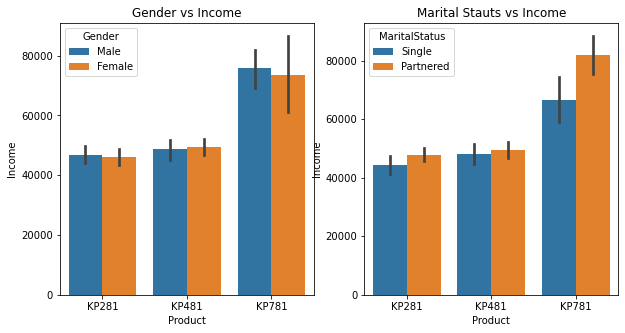

In [25]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(x='Product',y='Income',hue='Gender',data=df,ax=axs[0]).set(title='Gender vs Income')
sns.barplot(x='Product',y='Income',hue='MaritalStatus',data=df,ax=axs[1]).set(title='Marital Stauts vs Income')
plt.show()

 - As we see in both it matches to above peeple with more income buys advanced model.

#### Lets do probability and check.

In [26]:
df_1 = df.loc[df['Income'] >= np.median(df['Income'])]
df_2 = df.loc[df['Income'] <= np.median(df['Income'])]
df_Income1=pd.crosstab(df_1['Gender'],df_1['Product'])
df_Income2=pd.crosstab(df_2['Gender'],df_2['Product'])

In [27]:
df_Income1.loc['Female'] = df_Income1.loc['Female']/sum(df_Income1.loc['Female'])
df_Income1.loc['Male'] = df_Income1.loc['Male']/sum(df_Income1.loc['Male'])
df_Income1['Given']=['Female Income > Median','Male Income > Median']
df_Income1.set_index('Given',inplace=True)
df_Income1

Product,KP281,KP481,KP781
Given,,,
Female Income > Median,0.433333,0.333333,0.233333
Male Income > Median,0.283333,0.250000,0.466667


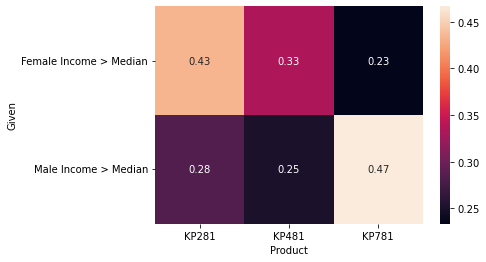

In [28]:
sns.heatmap(df_Income1,annot=True)
plt.show()

From above 
 - we can say that Female with income greater than median also prefers entry model
 - Male with more income prefers advanced model

In [29]:
df_Income2.loc['Female'] = df_Income2.loc['Female']/sum(df_Income2.loc['Female'])
df_Income2.loc['Male'] = df_Income2.loc['Male']/sum(df_Income2.loc['Male'])
df_Income2['Given']=['Female Income < Median','Male Income < Median']
df_Income2.set_index('Given',inplace=True)
df_Income2

Product,KP281,KP481,KP781
Given,,,
Female Income < Median,0.586957,0.413043,0.000000
Male Income < Median,0.522727,0.363636,0.113636


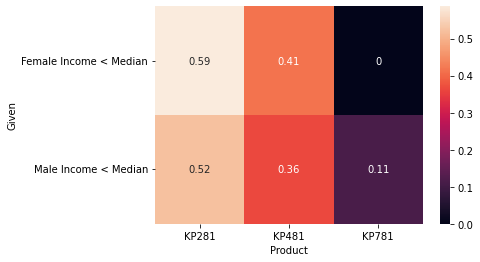

In [30]:
sns.heatmap(df_Income2,annot=True)
plt.show()

From above 
 - Irrespective of male or female people with income lesser than median prefer entry level model.

##### Lets comapre partnered female vs single female with income greater than median 
 - Why we are taking this ? -- As we saw other categories seems to be perform as expected who have more income buys advanced model but here with more income goes for entry level product so lets compare and check how different female groups reacts.

In [31]:
df_M = df_1.loc[df_1['Gender'] == 'Female']
df_M = pd.crosstab(df_M['MaritalStatus'],df_M['Product'])
df_M.loc['Single'] = df_M.loc['Single']/sum(df_M.loc['Single'])
df_M.loc['Partnered'] = df_M.loc['Partnered']/sum(df_M.loc['Partnered'])
df_M['Given']=['Partnered Female Income > Median','Single Female Income > Median']
df_M.set_index('Given',inplace=True)
df_M

Product,KP281,KP481,KP781
Given,,,
Partnered Female Income > Median,0.45,0.35,0.2
Single Female Income > Median,0.40,0.30,0.3


##### Conclusions
 - As per above nothing has changed both single and partnered women prefers entry level model.

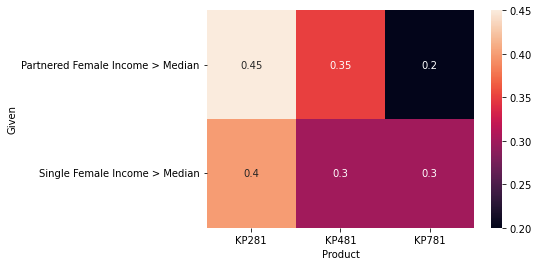

In [32]:
sns.heatmap(df_M,annot=True)
plt.show()

#### Lets compare Age vs Income and Education vs Income for different product

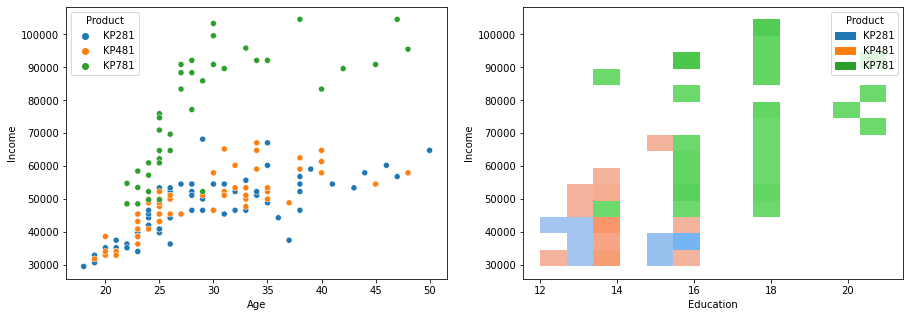

In [33]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.scatterplot(x='Age',y='Income',hue='Product',data=df,ax=axs[0])
sns.histplot(x='Education',y='Income',hue='Product',data=df,ax=axs[1])
plt.show()

 - Poeple with more Income buys advanced model irrespecctive of their age groups.
 - People who have education more than 16 years always prefer advanced model irrespective of their income.
 
#### Lets check from where if income is greater than this number people will purely wants advanced level.
 - As per below we see if income is greater than 70,000 people purely wants advanced level.

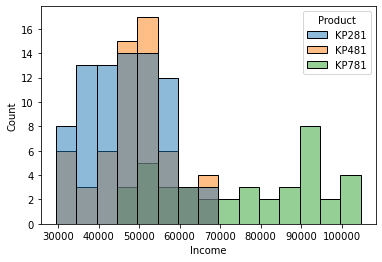

In [34]:
sns.histplot(x='Income',hue='Product',data=df)
plt.show()

#### Correlation
  Below have more correaltion and also it makes sense poeple who are fit would have used more and ran more miles.
 - Fitness and Miles 
 - Fitness and usuage
 - Usage and Miles 

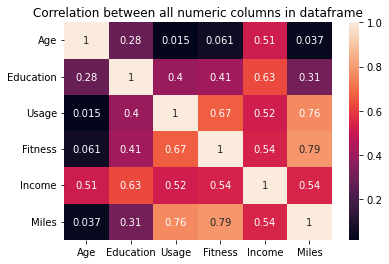

In [35]:
sns.heatmap(df.corr(),annot=True).set(title= 'Correlation between all numeric columns in dataframe')
plt.show()

 - As per below graph we can say if customers wants to be in atleast level 4 fitness , he or she expected to run more than 125 Miles.

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

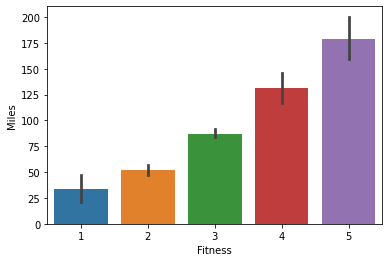

In [36]:
sns.barplot(x='Fitness',y='Miles',data=df)